In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your dataset
#rescale=1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizing pixel values
    #rotation_range=40,         # Randomly rotating images in the range (degrees, 0 to 180)
    # Applying shear transformations
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/face-classification-deep-learning/dataset/train',
        target_size=(90,90),
        batch_size=128,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        '/kaggle/input/face-classification-deep-learning/dataset/train',
        target_size=(90,90),
        batch_size=128,
        class_mode='categorical',
        subset='validation')

 #Define the model
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(90,90, 3))
base_model.trainable = True  # Freeze the convolutional base

model = models.Sequential([
    base_model,
   layers.GlobalAveragePooling2D(),
    layers.Dense(7000, activation='softmax')
    ])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 112000 images belonging to 7000 classes.
Found 28000 images belonging to 7000 classes.
219055592/219055592 [==============================] - 1s 0us/step


In [2]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 7000)              10759000  
                                                                 
Total params: 65,095,736
Trainable params: 65,035,192
Non-trainable params: 60,544
_________________________________________________________________


In [3]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
875/875 [==============================] - 727s 705ms/step - loss: 8.3540 - accuracy: 0.0021 - val_loss: 6.9491 - val_accuracy: 0.0132
Epoch 2/10
875/875 [==============================] - 244s 279ms/step - loss: 6.2652 - accuracy: 0.0504 - val_loss: 5.3975 - val_accuracy: 0.0926
Epoch 3/10
875/875 [==============================] - 242s 276ms/step - loss: 4.2742 - accuracy: 0.2257 - val_loss: 3.8011 - val_accuracy: 0.3392
Epoch 4/10
875/875 [==============================] - 243s 277ms/step - loss: 2.9340 - accuracy: 0.4196 - val_loss: 2.5266 - val_accuracy: 0.4906
Epoch 5/10
875/875 [==============================] - 240s 274ms/step - loss: 1.8507 - accuracy: 0.6127 - val_loss: 9.7920 - val_accuracy: 0.4725
Epoch 6/10
875/875 [==============================] - 243s 277ms/step - loss: 0.9858 - accuracy: 0.7900 - val_loss: 2.1300 - val_accuracy: 0.6095
Epoch 7/10
875/875 [==============================] - 244s 279ms/step - loss: 0.5897 - accuracy: 0.8804 - val_loss: 9.1741 -

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Directory containing test images
test_dir = '/kaggle/input/face-classification-deep-learning/dataset/test'

# Initialize a DataFrame to store the results
results = []
c=0
con = os.listdir(test_dir)
# Loop over each image in the test directory
for img_name in con:
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(90,90))
    img_array = image.img_to_array(img)
    img_array = img_array/255
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_label = [key for key, value in train_generator.class_indices.items() if value == predicted_class][0]
    results.append(class_label)
    c=c+1
    if c%1000==0:
        print(c)
res = pd.DataFrame({"image_name":con,"labels":results})

res.columns=["image_name","label"]

1/1 [==============================] - 0s 35ms/step
1000
1/1 [==============================] - 0s 39ms/step
2000
1/1 [==============================] - 0s 36ms/step
3000
1/1 [==============================] - 0s 35ms/step
4000
1/1 [==============================] - 0s 37ms/step
5000
1/1 [==============================] - 0s 38ms/step
6000
1/1 [==============================] - 0s 38ms/step
7000
1/1 [==============================] - 0s 37ms/step
8000
1/1 [==============================] - 0s 42ms/step
9000
1/1 [==============================] - 0s 39ms/step
10000
1/1 [==============================] - 0s 36ms/step
11000
1/1 [==============================] - 0s 38ms/step
12000
1/1 [==============================] - 0s 35ms/step
13000
1/1 [==============================] - 0s 37ms/step
18000
1/1 [==============================] - 0s 37ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 35ms/step
20000
1/1 [==============================] - 0s 43ms/step
21000
1/1 [==============================] - ETA: 0s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 36ms/step
24000
1/1 [==============================] - 0s 35ms/step
25000
1/1 [==============================] - 0s 35ms/step
26000
1/1 [==============================] - 0s 35ms/step
27000
1/1 [==============================] - 0s 35ms/step
28000
1/1 [==============================] - 0s 36ms/step
29000
1/1 [==============================] - 0s 37ms/step
30000
1/1 [==============================] - 0s 36ms/step
31000
1/1 [==============================] - 0s 39ms/step
32000
1/1 [==============================] - 0s 35ms/step
33000
1/1 [==============================] - 0s 35ms/step
34000
1/1 [==============================] - 0s 35ms/step
35000


In [12]:
res["sorter"]=[int(a.split(".")[0]) for a in res.image_name]
res.sort_values(by="sorter",inplace=True)
res=res.iloc[:,[0,1]]
res

,image_name,label
8890,1.jpg,n005304
33822,2.jpg,n006504
27639,3.jpg,n008965
26607,4.jpg,n003901
2548,5.jpg,n009201
...,...,...
13923,34996.jpg,n007070
32183,34997.jpg,n001073
23306,34998.jpg,n002514
1865,34999.jpg,n000479


In [13]:
# Save the results to a CSV file
res.to_csv('/kaggle/working/surp4.csv', index=False)

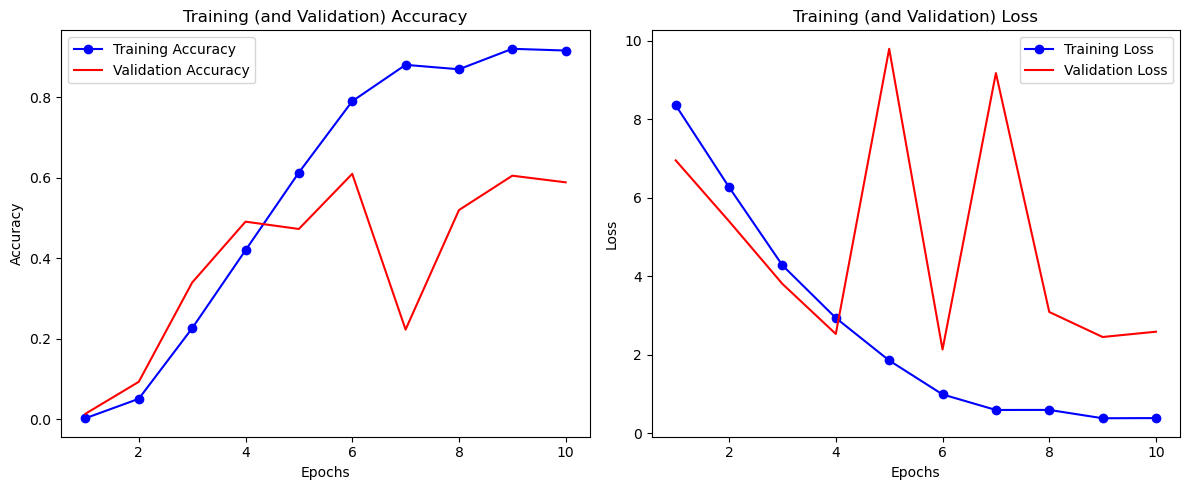

In [9]:
import matplotlib.pyplot as plt

# Assuming 'history' is your model's training history
# For example: history = model.fit(...)

# Extracting accuracy and loss values
accuracy = history.history['accuracy']
loss = history.history['loss']

# If you have validation data, you can also plot validation accuracy and loss:
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
# If you have validation data, include this line:
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training (and Validation) Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
# If you have validation data, include this line:
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training (and Validation) Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()